In [1]:
import pandas as pd
import numpy as np


In [2]:
train=pd.read_csv('F:\\study\\ml\\DataSet\\House_Prices\\train.csv')
test=pd.read_csv('F:\\study\\ml\\DataSet\\House_Prices\\test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(8,4)

In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
train.SalePrice.skew()

1.8828757597682129

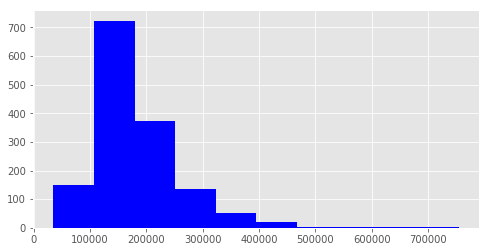

In [7]:
plt.hist(train.SalePrice,color='blue')
plt.show()

Skew is : 0.12133506220520406


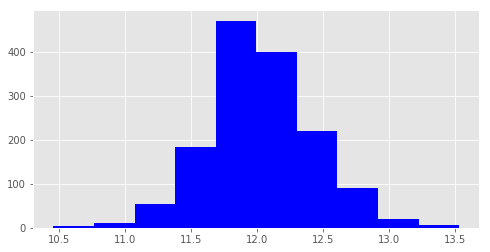

In [8]:
target=np.log(train.SalePrice)
print("Skew is :",target.skew())
plt.hist(target,color='blue')
plt.show()

In [9]:
numeric_features=train.select_dtypes(include=[np.number])


In [10]:
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
corr=numeric_features.corr()

In [12]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [13]:
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [14]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [15]:
quality_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)

In [16]:
train[['OverallQual','SalePrice']].groupby('OverallQual',as_index=False).agg(np.median)

,OverallQual,SalePrice
0,1,50150
1,2,60000
2,3,86250
3,4,108000
4,5,133000
5,6,160000
6,7,200141
7,8,269750
8,9,345000
9,10,432390


In [17]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


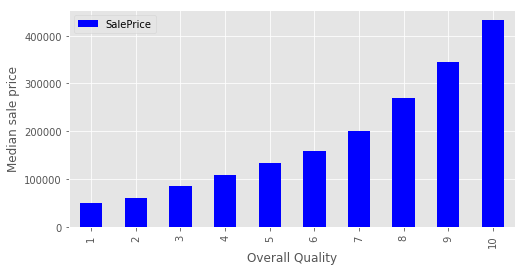

In [18]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median sale price')
plt.show()

In [19]:
train['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

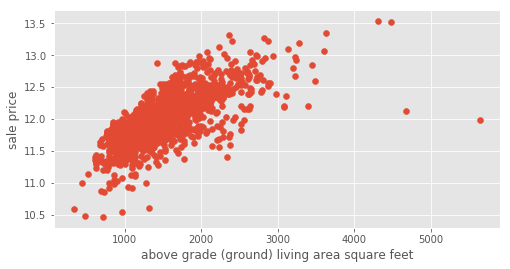

In [20]:
plt.scatter(x=train['GrLivArea'],y=target)
plt.ylabel('sale price')
plt.xlabel('above grade (ground) living area square feet')
plt.show()

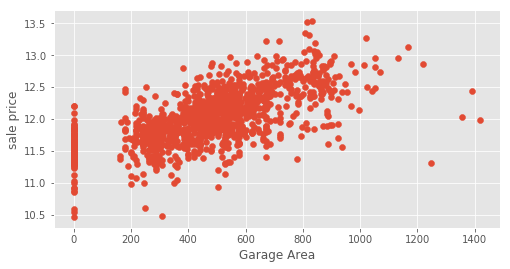

In [21]:
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel('sale price')
plt.xlabel('Garage Area')
plt.show()

In [22]:
#train=train[train.GarageArea<1200]

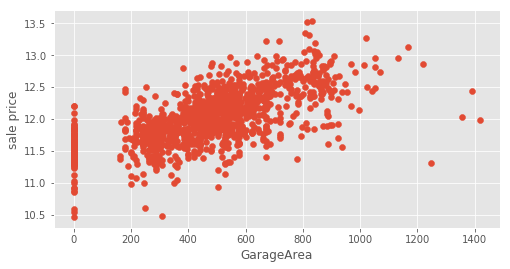

In [23]:
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel('sale price')
plt.xlabel('GarageArea')
plt.show()

In [24]:
target.shape

(1460,)

In [25]:
train=train[train.GarageArea<1200]

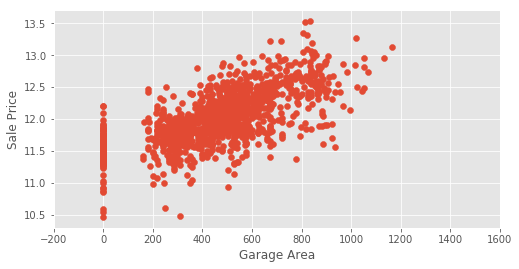

In [26]:
plt.scatter(train.GarageArea,np.log(train.SalePrice))
plt.xlabel('Garage Area')
plt.xlim([-200,1600])
plt.ylabel('Sale Price')
plt.show()

In [27]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       258
LotArea             0
Street              0
Alley            1364
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       689
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [28]:
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])


In [29]:
nulls

,0
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [30]:
nulls.columns=['Null Count']
nulls.index.name='Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [31]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [32]:
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [33]:
print("Original: \n")
print(train.Street.value_counts(),'\n')

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [34]:
train['enc_street']=pd.get_dummies(train.Street,drop_first=True)
test['enc_street']=pd.get_dummies(test.Street,drop_first=True)

In [35]:
test.Street.head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

In [36]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [37]:
condition_pivot=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('sale condition')
plt.ylabel('median sale price')
#plt.show()

Text(0,0.5,'median sale price')

In [38]:
def encode(x):
    if (x == 'Partial') :
        return 1
    else :
        return 0
    
        

In [39]:
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)

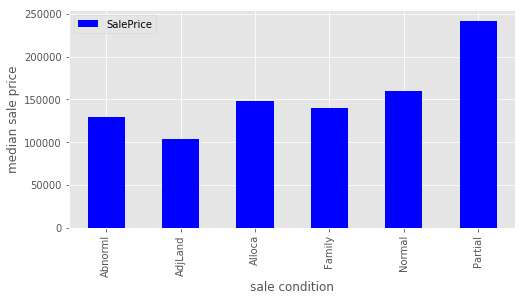

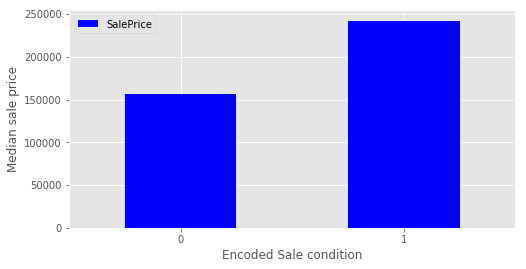

In [40]:
condition_pivot=train.pivot_table(index='enc_condition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Encoded Sale condition')
plt.ylabel('Median sale price')
plt.xticks(rotation=0)
plt.show()

In [41]:
train.select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,320,0,0,700,10,2009,143000,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,8,2007,307000,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,228,0,0,0,350,11,2009,200000,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,205,0,0,0,0,4,2008,129900,1,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,1,2008,118000,1,0


In [42]:
train.select_dtypes(include=[np.number]).interpolate()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,320,0,0,700,10,2009,143000,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,8,2007,307000,1,0
7,8,60,63.0,10382,7,6,1973,1973,240.0,859,...,228,0,0,0,350,11,2009,200000,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,205,0,0,0,0,4,2008,129900,1,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,1,2008,118000,1,0


In [43]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [44]:
sum(data.isnull().sum() !=0)

0

In [45]:
y=np.log(train.SalePrice)
x=data.drop(['SalePrice','Id'],axis=1)

In [46]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=13,test_size=0.3)

In [49]:
from sklearn import linear_model

In [74]:
#lr=linear_model.LinearRegression( n_jobs=-1,normalize=True)
lr=linear_model.LinearRegression( n_jobs=-1)
model=lr.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [75]:
model.score(X_test,y_test)

0.9021441224067159

In [76]:
predictions=model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
print('RMSE',mean_squared_error(y_test,predictions))

RMSE 0.016608842993825156


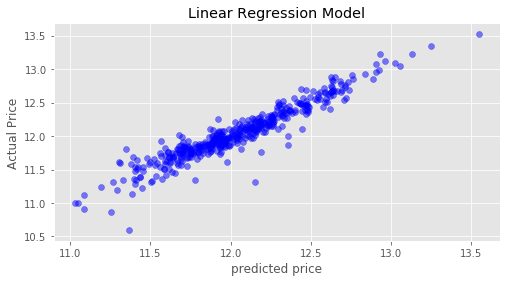

In [79]:
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=0.5,color='b')
plt.xlabel('predicted price')
plt.ylabel('Actual Price')
plt.title("Linear Regression Model")
plt.show()

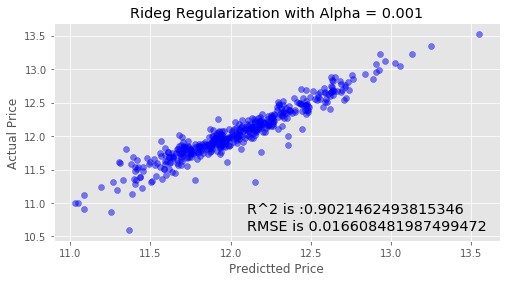

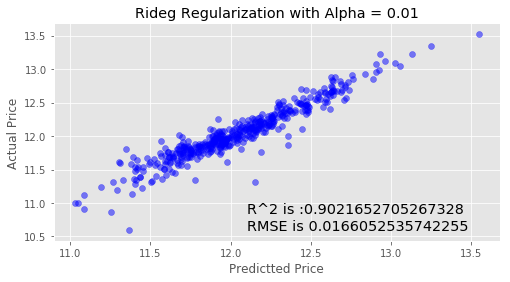

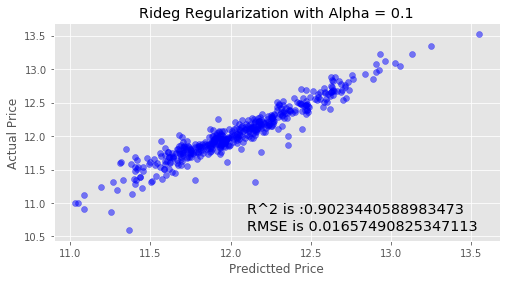

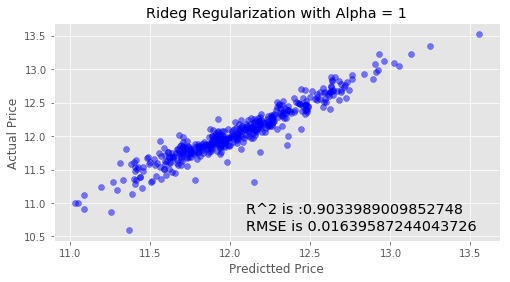

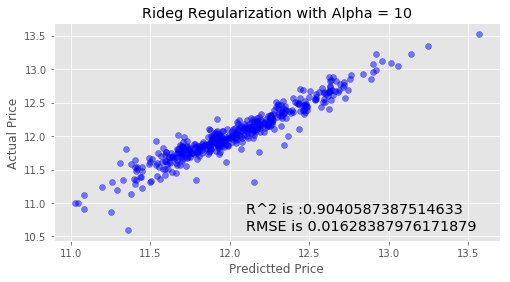

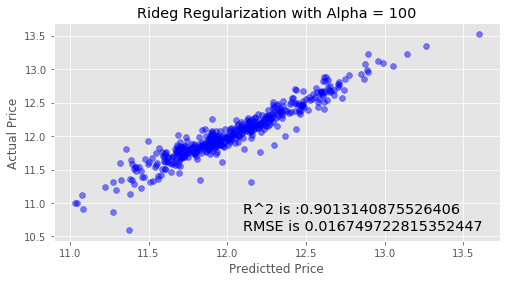

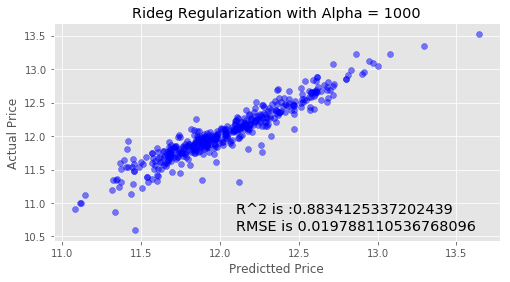

In [89]:
for i in range(-3,4):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model=rm.fit(X_train,y_train)
    preds_ridge=ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge,actual_values,alpha=0.5,color='b')
    plt.xlabel('Predictted Price')
    plt.ylabel('Actual Price')
    plt.title('Rideg Regularization with Alpha = {}'.format(alpha))
    overlay='R^2 is :{}\nRMSE is {}'.format(ridge_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [86]:
la=linear_model.Lasso()
la_model=la.fit(X_train,y_train)
la_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

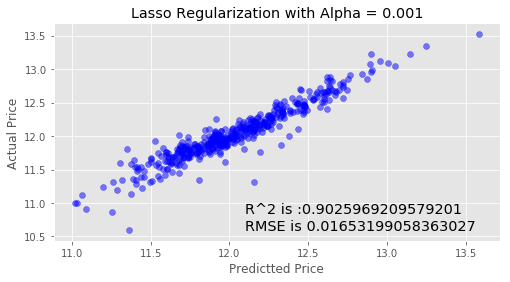

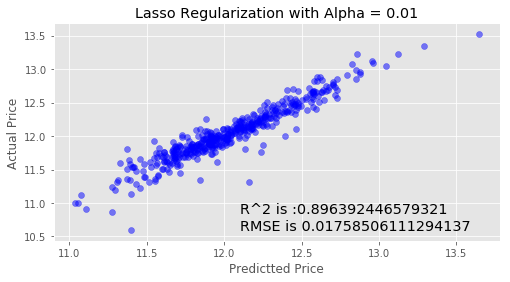

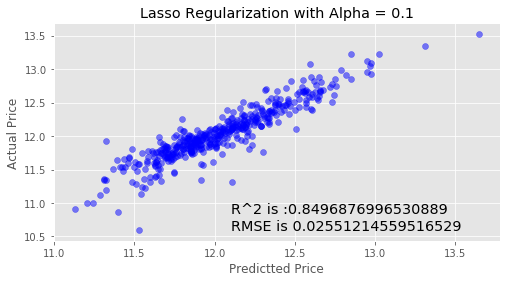

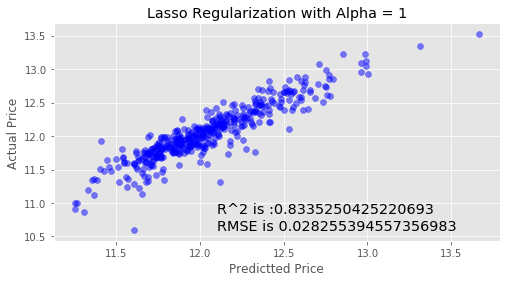

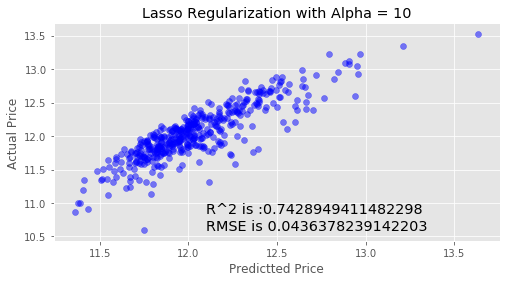

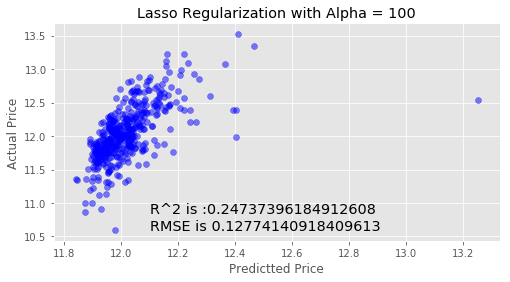

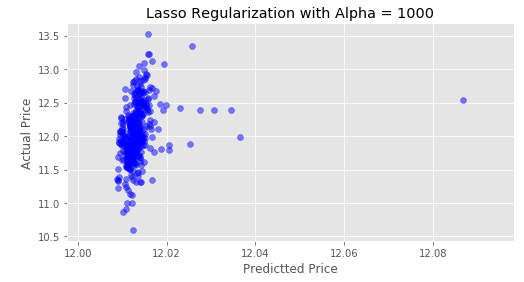

In [91]:
for i in range(-3,4):
    alpha=10**i
    la=linear_model.Lasso(alpha=alpha)
    lasso_model=la.fit(X_train,y_train)
    preds_ridge=lasso_model.predict(X_test)
    
    plt.scatter(preds_ridge,actual_values,alpha=0.5,color='b')
    plt.xlabel('Predictted Price')
    plt.ylabel('Actual Price')
    plt.title('Lasso Regularization with Alpha = {}'.format(alpha))
    overlay='R^2 is :{}\nRMSE is {}'.format(lasso_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()